In [17]:
!pip install 'stable-baselines[extra]' 

In [ ]:
!pip install PyAutoGUI

In [ ]:
!pip install mss pydirectinput pytesseract

In [ ]:
!pip install opencv-python

In [2]:
from mss import mss
#import pydirectinput
import pyautogui
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import time
#from gym import Env
from gymnasium import Env
from gymnasium.spaces import Box, Discrete
from DinoEnv import DinoGame

In [15]:
env = DinoGame()

In [42]:
obs = env.get_observation()

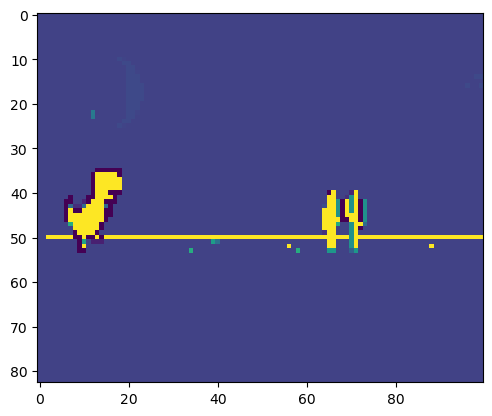

In [43]:
plt.imshow(obs[0]);

In [45]:
done, done_cap = env.get_done()
print(done)

True


In [48]:
for episode in range(3):
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        obs, reward, done, _, info = env.step(env.action_space.sample())
        total_reward += reward
    print(f'Total reward for episode {episode + 1 } is {total_reward}')

Total reward for episode 1 is -88
Total reward for episode 2 is -85
Total reward for episode 3 is -71


In [25]:
import os
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import env_checker

/Users/ahmet/.local/lib/python3.10/site-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [49]:
# Checking environment
env_checker.check_env(env)

In [50]:
# Save the model Callbacks to the directories that we will define
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [28]:
checkpoint_dir = './train/'
log_dir = './logs/'

In [29]:
callback = TrainAndLoggingCallback(check_freq = 1000, save_path = checkpoint_dir)

In [30]:
from stable_baselines3 import DQN

In [16]:
# define DQN model
model = DQN('CnnPolicy', env, tensorboard_log = log_dir, verbose = 1,
            buffer_size=150000, learning_starts = 1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [18]:
model.learn(total_timesteps=150000, callback=callback)

Logging to ./logs/DQN_11
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | -75      |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2        |
|    time_elapsed     | 33       |
|    total_timesteps  | 70       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | -73.9    |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2        |
|    time_elapsed     | 60       |
|    total_timesteps  | 137      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | -75.4    |
|    exploration_rate | 0.988    |
| time/               |       

In [51]:
best_model = DQN.load(os.path.join('train', 'best_model_150000'))

In [ ]:
for episode in range(10):
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ =  best_model.predict(obs)
        obs, reward, done, _, info = env.step(int(action))
        total_reward += reward
    print(f'Total reward for episode {episode + 1 } is {total_reward}')